In [7]:
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import numpy as np
from PIL import Image
import pycocotools.mask as maskUtils

sys.path.append('..')
from datasets import MapillaryDataset

def apply_color_map(image_array, labels):
    color_array = np.zeros((image_array.shape[0], image_array.shape[1], 3), dtype=np.uint8)

    for label_id, label in enumerate(labels):
        # set all pixels with the current label to the color of the current label
        color_array[image_array == label_id] = label["color"]
    return color_array


def show(img_list, scale=1.0):
    num = len(img_list)
    plt.figure(figsize=(15 * scale, 8 * scale))
    for i, im in enumerate(img_list):
        plt.subplot(1, num, i + 1)
        plt.imshow(im)
    plt.show()
    
def show_combo(m1, m2):
    plt.figure(figsize=(15, 8))
    canvas = np.zeros_like(m1).astype(np.float32)
    canvas[m1 == 1] += 0.3
    canvas[m2 == 1] += 0.5
    plt.imshow(canvas)
    plt.show()
    

In [11]:
root = '../data/mapillary'
with open('{}/config.json'.format(root)) as config_file:
    config = json.load(config_file)
labels = config['labels']
cat_names = [l['readable'] for l in labels]

In [9]:
# dataset
phase = 'validation'
root = '../data/mapillary'
image_root = "{}/{}".format(root, phase)
annot_path = "../data/mapillary/meta/{}.json".format(phase)

data_reader = MapillaryDataset(root, annot_path)

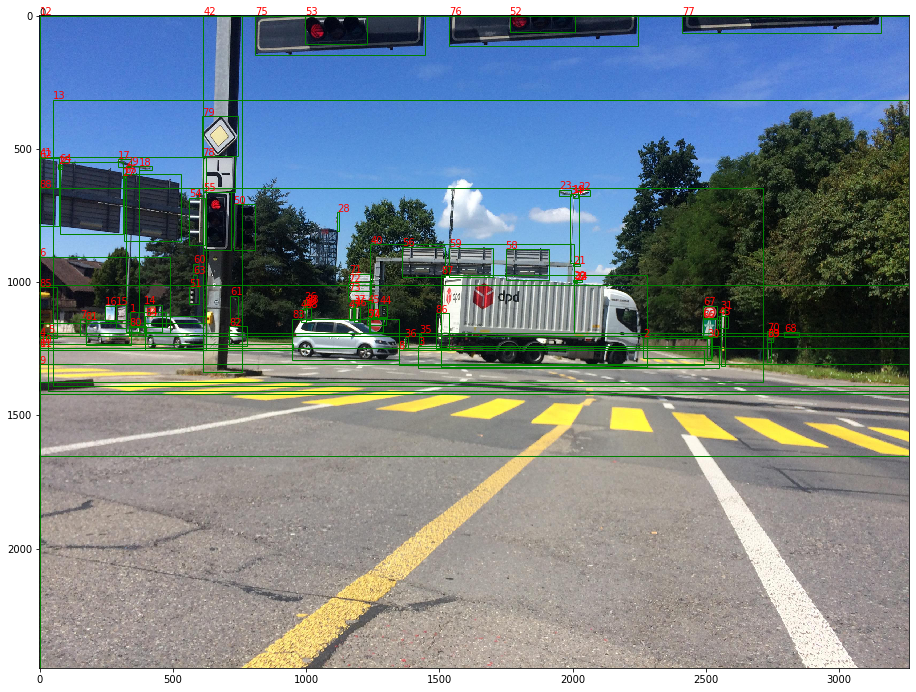

--BJs76vloEaiH-wppzWNA.jpg


In [3]:
img_idx = 0
#img_idx = np.random.choice(len(data_reader.img_ids)) # randomly choose an image
modal, category, ori_bboxes, _, image_fn = data_reader.get_image_instances(img_idx, with_gt=False)
img_path = os.path.join(root, phase, 'images', image_fn)
img = Image.open(img_path)
image = np.array(img)
height, width = img.height, img.width
plt.figure(figsize=(16, 16./width*height))
plt.imshow(img)
plt.text(0, 0, str(img_idx))
ax = plt.gca()
for i, bbox in enumerate(ori_bboxes):
    rect = patches.Rectangle(bbox[:2], bbox[2], bbox[3], linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    ax.text(bbox[0], bbox[1]-2, str(i), color='r')
plt.show()
print(image_fn)

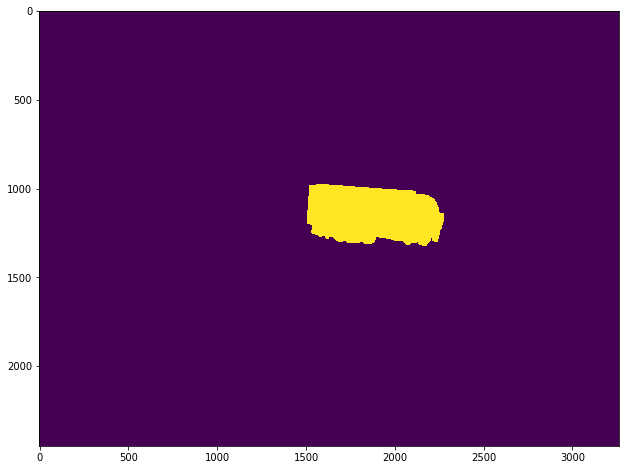

Truck


In [16]:
idx = 87
show([modal[idx]])
print(cat_names[category[idx]])